# Logistic Regression

Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables. Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1. Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

Logistic regression essentially uses a logistic function defined below to model a binary output variable (Tolles & Meurer, 2016). The primary difference between linear regression and logistic regression is that logistic regression's range is bounded between 0 and 1. In addition, as opposed to linear regression, logistic regression does not require a linear relationship between inputs and output variables. This is due to applying a nonlinear log transformation to the odds ratio. Logistic function is also called sigmoid function.
$$
LogisticFunction = \frac{1}{1+e^{-x}}
$$
Where x is the input variable.
<p align="center">
    <img src="LR1.png" width="300">
</p>

### Linear regression vs logistic regression
Both linear and logistic regression are among the most popular models within data science, and open-source tools, like Python and R, make the computation for them quick and easy.

Linear regression models are used to identify the relationship between a continuous dependent variable and one or more independent variables. When there is only one independent variable and one dependent variable, it is known as simple linear regression, but as the number of independent variables increases, it is referred to as multiple linear regression. For each type of linear regression, it seeks to plot a line of best fit through a set of data points, which is typically calculated using the least squares method.

Similar to linear regression, logistic regression is also used to estimate the relationship between a dependent variable and one or more independent variables, but it is used to make a prediction about a categorical variable versus a continuous one. A categorical variable can be true or false, yes or no, 1 or 0, et cetera. The unit of measure also differs from linear regression as it produces a probability, but the logit function transforms the S-curve into straight line.  

While both models are used in regression analysis to make predictions about future outcomes, linear regression is typically easier to understand. Linear regression also does not require as large of a sample size as logistic regression needs an adequate sample to represent values across all the response categories. Without a larger, representative sample, the model may not have sufficient statistical power to detect a significant effect.
<p align="center">
    <img src="LR2.png" width="600">
</p>

### Task
In this project,I will use logistic model to predict whether or not a particular person has diabetes or not. The goal is to predict if a particular person has diabetes based on the features of the user.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('diabetes.csv') 
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


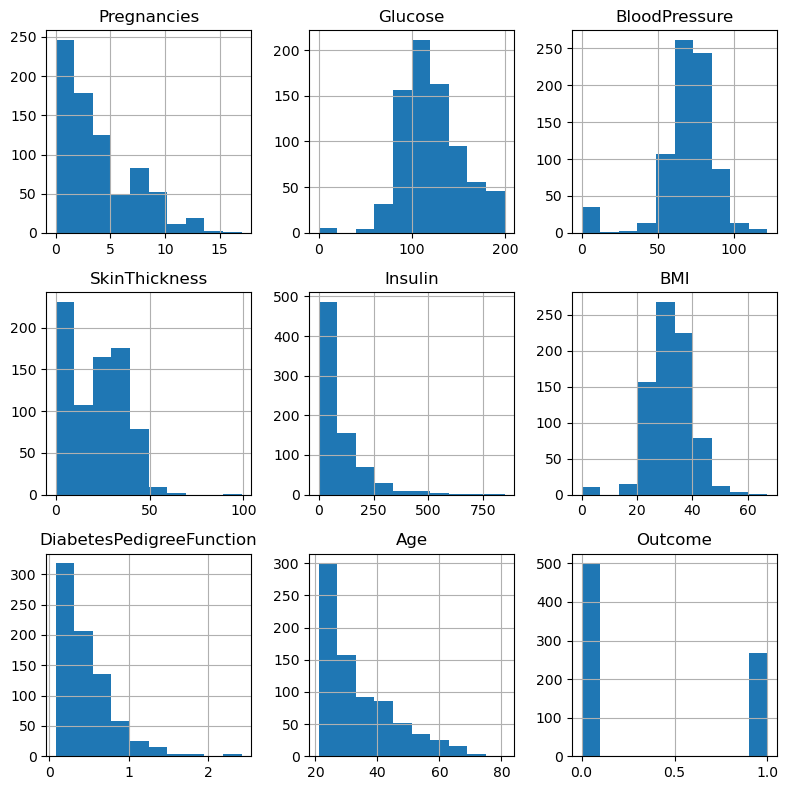

In [5]:
data.hist(figsize = (8,8))
plt.tight_layout()
plt.show()

/Users/xueqilu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Glucose', ylabel='Density'>

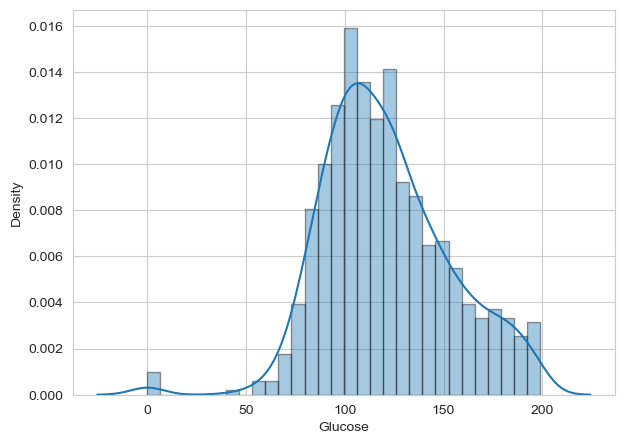

In [6]:
plt.figure(figsize=(7,5))
sns.set_style('whitegrid')
sns.distplot(data['Glucose'], bins = 30, kde=True, hist_kws=dict(edgecolor="black", linewidth=1))

In [7]:
data.isnull().count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [8]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
data.duplicated().sum()

0

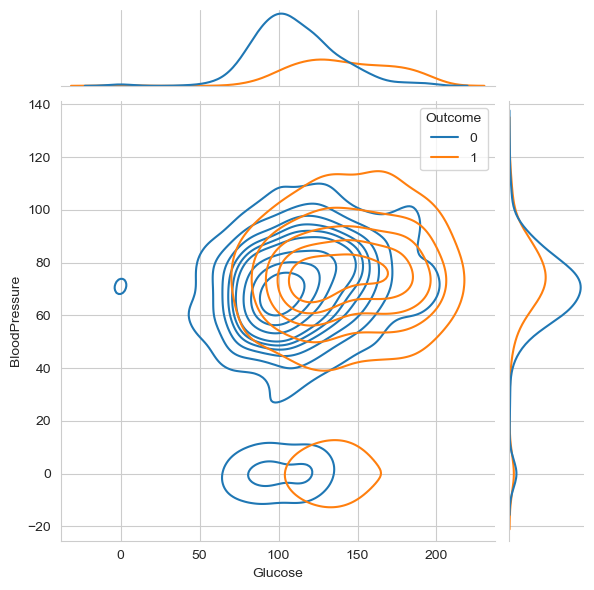

In [10]:
sns.jointplot(x='Glucose', y='BloodPressure', data= data, hue='Outcome',kind='kde')

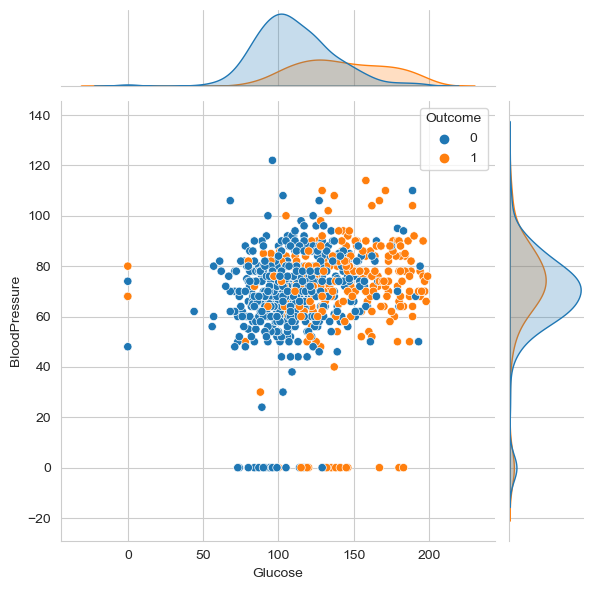

In [11]:
sns.jointplot(x='Glucose', y='BloodPressure',hue='Outcome', data = data) 

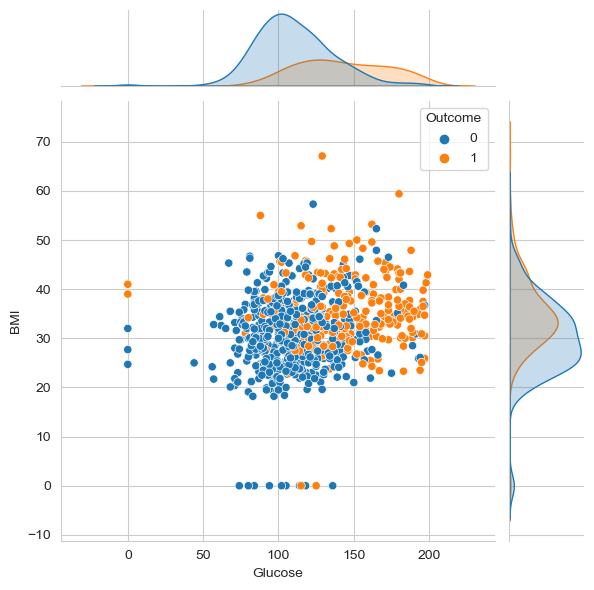

In [12]:
sns.jointplot(x='Glucose', y='BMI',data=data,hue='Outcome')

/Users/xueqilu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SkinThickness', ylabel='count'>

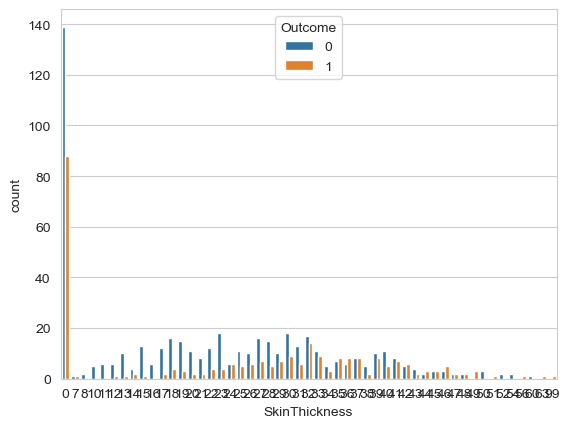

In [13]:
sns.countplot(data['SkinThickness'],hue = data['Outcome'])

<Figure size 1000x1000 with 0 Axes>

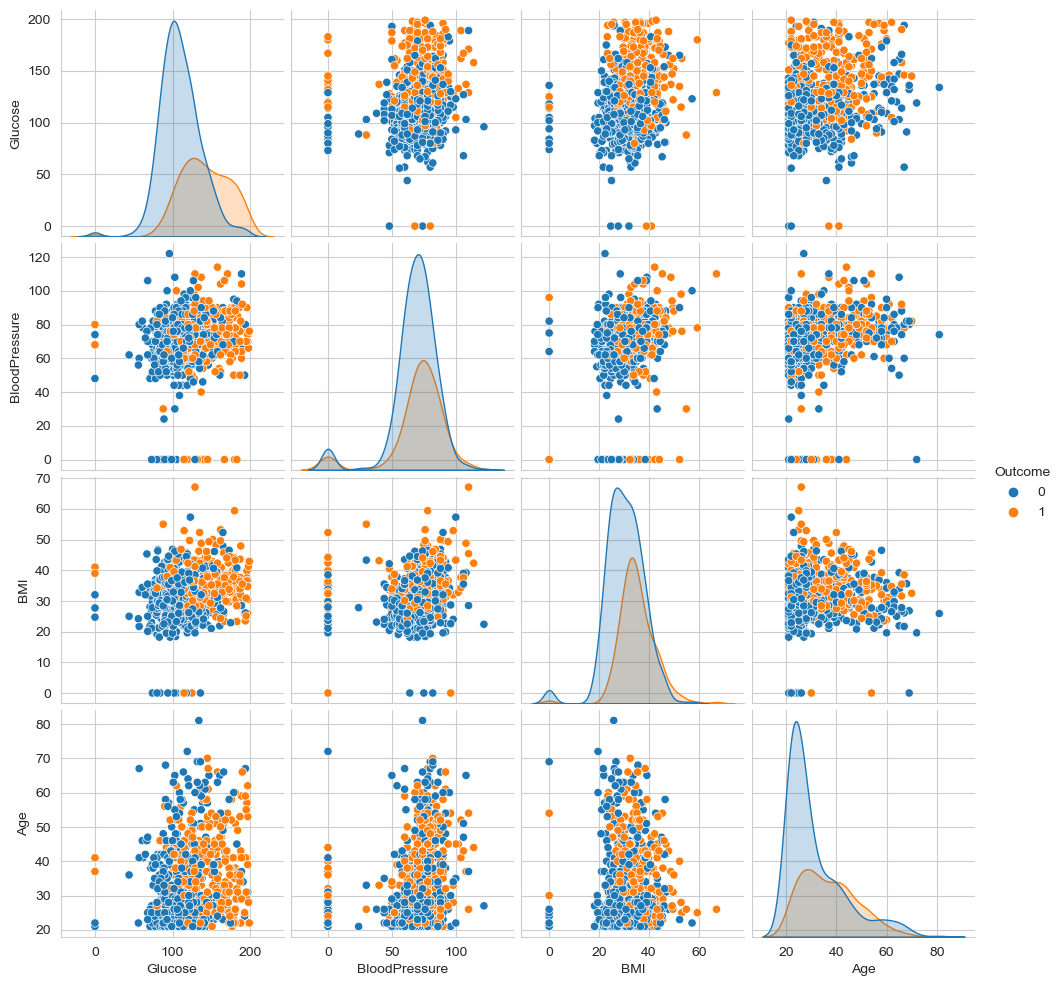

In [14]:
plt.figure(figsize=(10, 10))
sns.pairplot(
    data,
    hue ='Outcome',
    vars=['Glucose', 'BloodPressure', 'BMI', 'Age'],
    diag_kind='kde',
    
)
plt.show()

<AxesSubplot:>

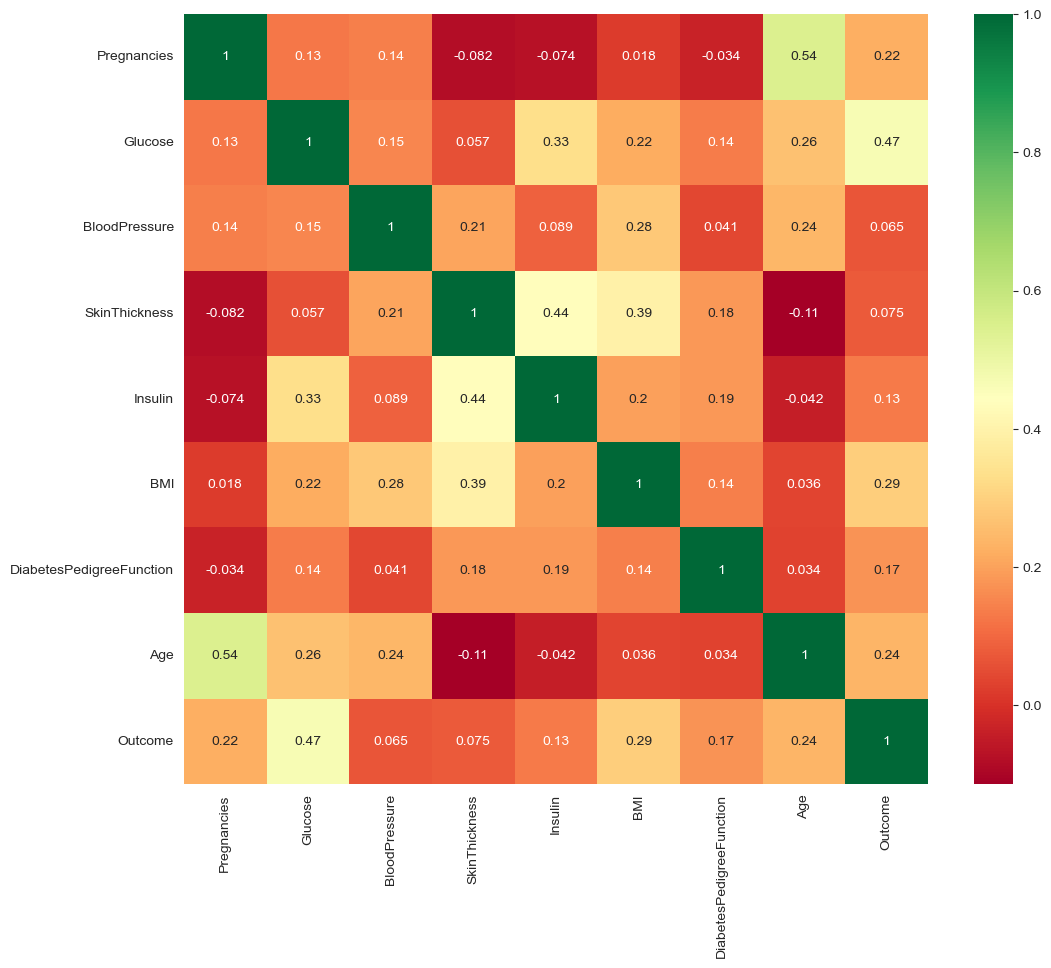

In [15]:
fig = plt.figure(figsize = (12,10))
sns.heatmap(data.corr(), annot = True, cmap='RdYlGn') 

<AxesSubplot:xlabel='Glucose', ylabel='Outcome'>

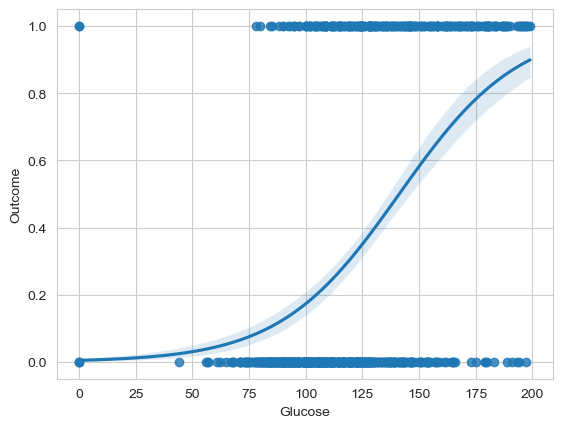

In [18]:
sns.regplot(x="Glucose", y="Outcome", data=data,logistic=True)

### Multivariable Logistic Regression

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

In [21]:
X = data[['Glucose', 'BloodPressure', 'BMI', 'Age']]
y = data['Outcome']
X

,Glucose,BloodPressure,BMI,Age
0,148,72,33.6,50
1,85,66,26.6,31
2,183,64,23.3,32
3,89,66,28.1,21
4,137,40,43.1,33
...,...,...,...,...
763,101,76,32.9,63
764,122,70,36.8,27
765,121,72,26.2,30
766,126,60,30.1,47


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
print ("Train - Accuracy :", metrics.accuracy_score(y_train,logistic.predict(X_train)))

Train - Accuracy : 0.7839851024208566


Text(0.5, 1.0, 'Confusion matrix for Logistic Regression')

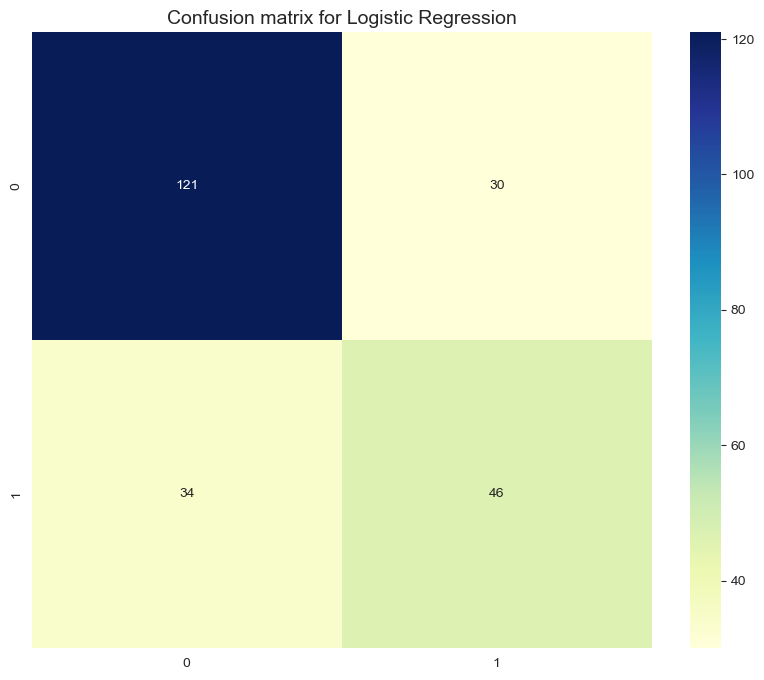

In [23]:
y_pred = logistic.predict(X_test)
fig = plt.figure(figsize = (10,8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='g',cmap="YlGnBu")
plt.title('Confusion matrix for Logistic Regression',fontsize=14)

In [24]:
cr = classification_report(y_test, y_pred,target_names=['Not Clicked','Clicked'])
print(cr)

              precision    recall  f1-score   support

 Not Clicked       0.78      0.80      0.79       151
     Clicked       0.61      0.57      0.59        80

    accuracy                           0.72       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231



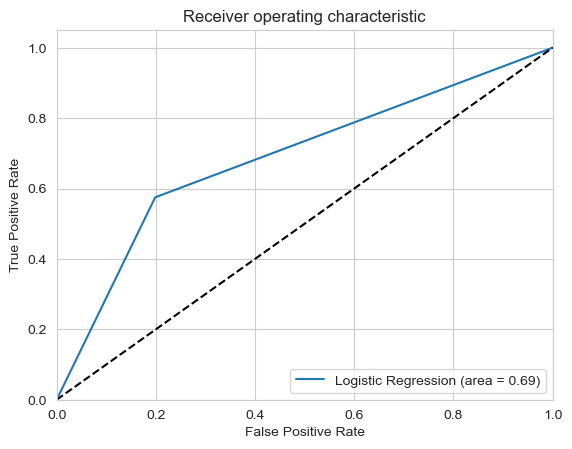

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()